In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [3]:
# simulate 100 data points for the particle location
def simulate_data_points(A, C, Q, R):

    # initial distribution
    mu_0 = np.asarray([0, 0])
    sigma_0 = np.asarray([[1, 0], [0, 1]])

    # generate x_1: [loc, velocity]
    x_1 = np.random.multivariate_normal(mu_0, sigma_0)
    y_1 = C.dot(x_1) + np.random.normal(0, R)

    # initialize empty lists for saving x_t, y_t and add the first sample
    X = []
    Y = []
    X.append(x_1)
    Y.append(y_1)

    # add additional 99 points according to linear dynamical model
    for i in range(99):
        # generate next x
        x_t_prev = X[-1]
        x_t = A.dot(x_t_prev) + np.random.multivariate_normal(np.asarray([0, 0]), Q)
        X.append(x_t)

        # generate next y
        y_t = C.dot(x_t) + np.random.normal(0, R)
        Y.append(y_t)

    return X, Y

In [4]:
def kalman_filter(A, C, Y, Q, R):

    # initial distribution
    x_t_t_minus_1 = np.asarray([0, 0])  # initial expected location
    P_t_t_minus_1 = np.asarray([[1, 0], [0, 1]])  #  initial covariance

    I = np.asarray([[1, 0], [0, 1]])

    estimated_location = []
    # predict the location of the next 100 points based on kalman filter
    for i in range(100):
        K_t = P_t_t_minus_1.dot(np.transpose(C))/(C.dot(P_t_t_minus_1).dot(np.transpose(C)) + R)
        x_t_t = x_t_t_minus_1 + K_t.dot(Y[i-1] - C.dot(x_t_t_minus_1))
        P_t_t = (I - K_t.dot(C)).dot(P_t_t_minus_1).dot(np.transpose(I - K_t.dot(C))) + R*K_t.dot(np.transpose(K_t))

        P_t_t_minus_1 = A.dot(P_t_t).dot(np.transpose(A)) + Q
        x_t_t_minus_1 = A.dot(x_t_t)
        estimated_location.append(x_t_t)

    return estimated_location


In [5]:
def run(A, C, Q, R):

    X, Y = simulate_data_points(A, C, Q, R)
    # get the location from the X tuple
    loc = np.asarray([x_loc for x_loc, x_vel in X])
    # build the time axis, e.g. 1-100
    time_axis = np.asarray([i for i in range(100)])
    plt.plot(time_axis, loc, '-g', label='true position')

    # plot kalmam estimated location vs the real location
    kelman_X = kalman_filter(A, C, Y, Q, R)
    est_loc = np.asarray([x_loc for x_loc, x_vel in kelman_X])
    plt.plot(time_axis, est_loc, ':b', label='estimated position')
    plt.legend()
    plt.ylabel("position")
    plt.xlabel("time")

    plt.show()

    # compare between the measurements and kalmam filter estimate
    y_diff = np.sum((np.asarray(Y).squeeze() - loc)**2)
    kalman_diff = np.sum((est_loc - loc)**2)
    print("measurement MSE: " + str(y_diff) + ", Kalman MSE: " + str(kalman_diff))
    print("\nKalman Filter estimate is better than the direct measurement estimate.\n"
          "This is an expected outcome since as part of the Kalman filter estimation\n"
          "the measurement is taken into account as well as the previous location.\n"
          "Therefore, we use more knowledge which reduce the uncertainty in estimating the next location.")

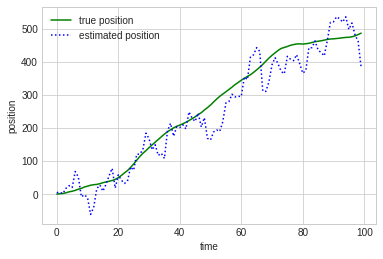

measurement MSE: 797558.3451163422, Kalman MSE: 216568.50810904367

Kalman Filter estimate is better than the direct measurement estimate.
This is an expected outcome since as part of the Kalman filter estimation
the measurement is taken into account as well as the previous location.
Therefore, we use more knowledge which reduce the uncertainty in estimating the next location.


In [6]:
np.random.seed(999)
A = np.array([[1, 1], [0, 0.98]])
C = np.asarray([[1, 0]])
Q = np.asarray([[0, 0], [0, 1]])
R = np.asarray([100])

run(A, C, Q, R)
